In [1]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('1651277648862_healthinsurance.csv')

In [28]:
df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6


**Preprocessing**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [30]:
df.isnull().any()

age                     True
sex                    False
weight                 False
bmi                     True
hereditary_diseases    False
no_of_dependents       False
smoker                 False
city                   False
bloodpressure          False
diabetes               False
regular_ex             False
job_title              False
claim                  False
dtype: bool

In [34]:
df.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

In [35]:
df = df.dropna(subset=['age'])

In [36]:
df.loc[:, 'bmi'] = df['bmi'].fillna(df['bmi'].median())

In [37]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 30)

Column: age
[60. 49. 32. 61. 19. 42. 18. 21. 63. 40. 51. 59. 27. 56. 52. 20. 24. 53.
 38. 54. 64. 50. 46. 55. 36. 44. 62. 48. 31. 43. 47. 41. 22. 45. 57. 23.
 58. 28. 34. 26. 35. 25. 37. 33. 29. 30. 39.]
------------------------------
Column: sex
['male' 'female']
------------------------------
Column: weight
[64 75 53 50 89 59 52 55 69 68 45 67 46 76 44 60 82 40 71 61 70 84 51 48
 62 94 41 57 49 85 79 90 72 43 65 91 80 74 47 56 54 83 81 77 66 58 86 88
 95 73 93 78 92 63 42 87 34 36]
------------------------------
Column: bmi
[24.3 22.6 17.8 36.4 20.6 37.9 23.8 26.8 29.4 29.6 33.  36.5 24.6 35.7
 18.9 40.3 27.2 41.3 38.4 28.5 31.8 31.3 25.7 25.3 24.8 39.4 25.5 26.9
 24.  37.1 44.8 25.1 32.3 28.7 35.2 26.7 26.4 22.3 25.8 21.9 40.2 38.6
 39.2 28.9 25.9 32.7 29.7 26.  35.6 46.8 34.2 23.1 31.6 40.9 27.6 22.9
 18.3 25.2 34.4 34.1 23.9 22.1 32.2 38.3 37.3 33.2 33.3 27.7 31.4 46.5
 35.3 27.5 23.5 21.5 39.8 38.1 32.  20.5 26.6 28.3 25.  27.4 39.7 29.8
 23.2 40.  21.8 17.5 20.1 18.5 24.1 43.3 3

In [38]:
# Make sure df is a fresh copy to avoid SettingWithCopyWarning
df = df.copy()

# Binning age into 10-year groups and replacing original column
bins_age = list(range(10, 81, 10))  # [10, 20, ..., 70]
labels_age = [f"{i}-{i+10}" for i in bins_age[:-1]]
df.loc[:, 'age'] = pd.cut(df['age'], bins=bins_age, labels=labels_age, right=False)

# Binning BMI into categories and replacing original column
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II']
df.loc[:, 'bmi'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

# Binning blood pressure into categories and replacing original column
bp_bins = [0, 80, 90, 120, 140, 200]
bp_labels = ['Low', 'Normal', 'Pre-High', 'High', 'Very High']
df.loc[:, 'bloodpressure'] = pd.cut(df['bloodpressure'], bins=bp_bins, labels=bp_labels, right=False)

# Grouping rare cities and replacing the original column
city_counts = df['city'].value_counts()
common_cities = city_counts[city_counts > 10].index
df.loc[:, 'city'] = df['city'].apply(lambda x: x if x in common_cities else 'Other')

weight_bins = list(range(30, 101, 10))  # [30, 40, 50, ..., 100]
weight_labels = [f"{i}-{i+10}" for i in weight_bins[:-1]]
df.loc[:, 'weight'] = pd.cut(df['weight'], bins=weight_bins, labels=weight_labels, right=False).astype(str)

C:\Users\pahar\AppData\Local\Temp\ipykernel_34040\1996121503.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['60-70', '40-50', '30-40', '60-70', '10-20', ..., '30-40', '30-40', '20-30', '50-60', '50-60']
Length: 14604
Categories (7, object): ['10-20' < '20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'age'] = pd.cut(df['age'], bins=bins_age, labels=labels_age, right=False)
C:\Users\pahar\AppData\Local\Temp\ipykernel_34040\1996121503.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Normal', 'Normal', 'Underweight', 'Obese II', 'Normal', ..., 'Overweight', 'Overweight', 'Obese I', 'Obese II', 'Overweight']
Length: 14604
Categories (5, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese I' < 'Obese II']' has dtype incom

In [39]:
df.head(4)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60-70,male,60-70,Normal,NoDisease,1,0,NewYork,Low,0,0,Actor,13112.6
1,40-50,female,70-80,Normal,NoDisease,1,0,Boston,Low,1,1,Engineer,9567.0
2,30-40,female,60-70,Underweight,Epilepsy,2,1,Phildelphia,Normal,1,1,Academician,32734.2
3,60-70,female,50-60,Obese II,NoDisease,1,1,Pittsburg,Low,1,0,Chef,48517.6


In [40]:
df.to_csv("new.csv", index=False)

In [41]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 30)

Column: age
['60-70', '40-50', '30-40', '10-20', '20-30', '50-60']
Categories (7, object): ['10-20' < '20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80']
------------------------------
Column: sex
['male' 'female']
------------------------------
Column: weight
['60-70' '70-80' '50-60' '80-90' '40-50' '90-100' '30-40']
------------------------------
Column: bmi
['Normal', 'Underweight', 'Obese II', 'Overweight', 'Obese I']
Categories (5, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese I' < 'Obese II']
------------------------------
Column: hereditary_diseases
['NoDisease' 'Epilepsy' 'EyeDisease' 'Alzheimer' 'Arthritis'
 'HeartDisease' 'Diabetes' 'Cancer' 'High BP' 'Obesity']
------------------------------
Column: no_of_dependents
[1 2 0 3 4 5]
------------------------------
Column: smoker
[0 1]
------------------------------
Column: city
['NewYork' 'Boston' 'Phildelphia' 'Pittsburg' 'Buffalo' 'AtlanticCity'
 'Portland' 'Cambridge' 'Hartford' 'Springfield' 'Syracuse' 'B

In [42]:
from sklearn.preprocessing import LabelEncoder

# Create a copy for encoding
df_encoded = df.copy()

# Label encode all object or category dtype columns
label_enc = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

In [43]:
# Compute correlation matrix
correlation_matrix = df_encoded.corr()
print(correlation_matrix)

                          age       sex    weight       bmi  \
age                  1.000000  0.013751  0.281019  0.008915   
sex                  0.013751  1.000000  0.167073  0.007417   
weight               0.281019  0.167073  1.000000  0.030516   
bmi                  0.008915  0.007417  0.030516  1.000000   
hereditary_diseases  0.037651 -0.037690  0.009142 -0.026673   
no_of_dependents     0.069024  0.052481  0.135945 -0.016626   
smoker              -0.013200  0.073666  0.020844  0.001414   
city                 0.001570 -0.005479  0.012333  0.002537   
bloodpressure        0.002354 -0.005339 -0.026679  0.004968   
diabetes             0.068116 -0.009021  0.001263  0.026049   
regular_ex           0.005030  0.015129 -0.002513 -0.029879   
job_title           -0.132414  0.004621 -0.086251 -0.015152   
claim                0.299362  0.053062  0.090363  0.007673   

                     hereditary_diseases  no_of_dependents    smoker  \
age                             0.037651     

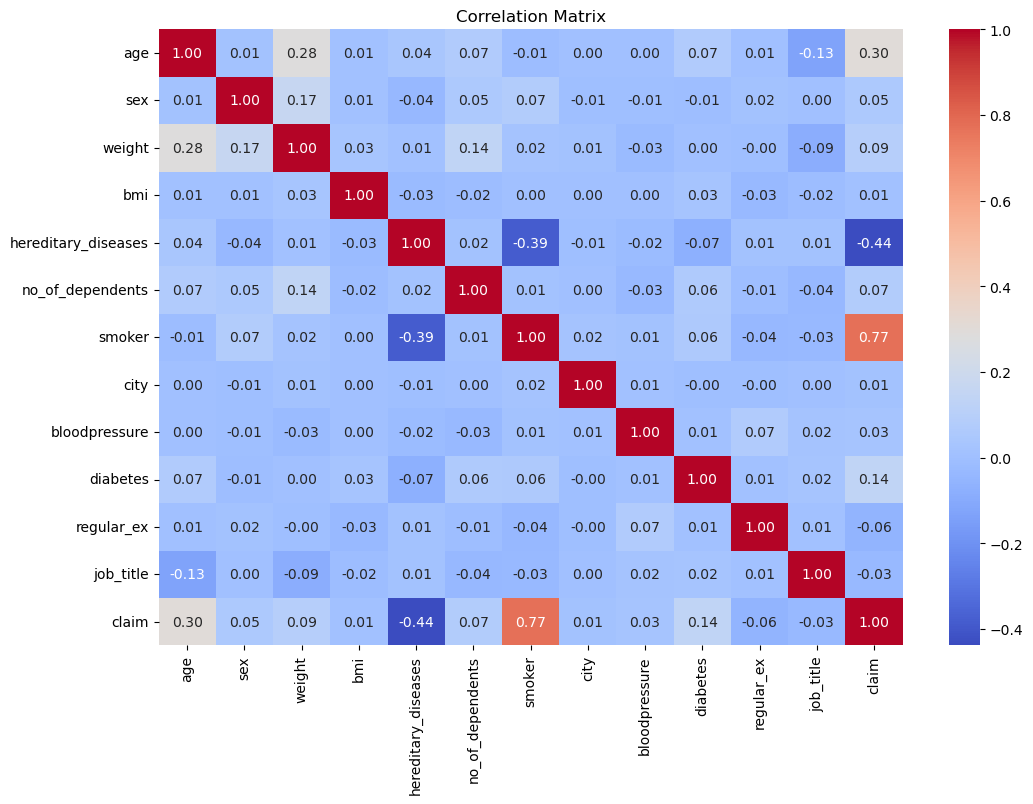

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [45]:
df_encoded.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,5,1,3,0,8,1,0,55,1,0,0,2,13112.6
1,3,0,4,0,8,1,0,5,1,1,1,16,9567.0
2,2,0,3,4,4,2,1,63,2,1,1,0,32734.2
3,5,0,2,2,8,1,1,64,1,1,0,10,48517.6
4,0,0,2,0,8,0,0,8,2,1,0,22,1731.7


In [47]:
df_encoded = df_encoded.drop('city', axis=1)

In [52]:
df_encoded.to_csv("df_encoded.csv", index=False)

In [ ]:
!pip uninstall pycaret